In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calcula_ticks(lista,barras):
    lista.sort()
    menor_valor = lista[0]
    maior_valor = lista[-1]
    intervalo = (maior_valor - menor_valor)/barras
    ticks = [menor_valor]
    ultimo = menor_valor+intervalo
    ticks.append(ultimo)
    for x in range(barras-1):
        ultimo += intervalo
        ticks.append(ultimo)
    return ticks

In [3]:
km = pd.Series([4,6,6,7,11,13,18,19,21,24,26,27,35,36,36,42,43,45,49])

In [4]:
def pct(x):
    return "{0:.2f}%".format(x*100)

In [5]:
def frequencia_relativa(total,yticks):
    freq_rel = []
    for item in yticks:
        x = item/total
        freq_rel.append(pct(x))
    return freq_rel

In [6]:
def gera_histograma(barras,data_series,titulo,unidade):
    lista = data_series.values
    ax = data_series.plot.hist(bins=barras,rwidth=0.95)

    yticks = ax.get_yticks()
    total = len(lista)
    freq_rel = frequencia_relativa(total,yticks)
    ax.set_yticklabels(freq_rel)
    
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    fig.set_dpi(150)

    ticks = calcula_ticks(lista,barras)
    plt.xticks(ticks)
    plt.title(titulo)
    plt.xlabel(unidade)
    plt.ylabel('Frequência')
    plt.grid(axis='y')

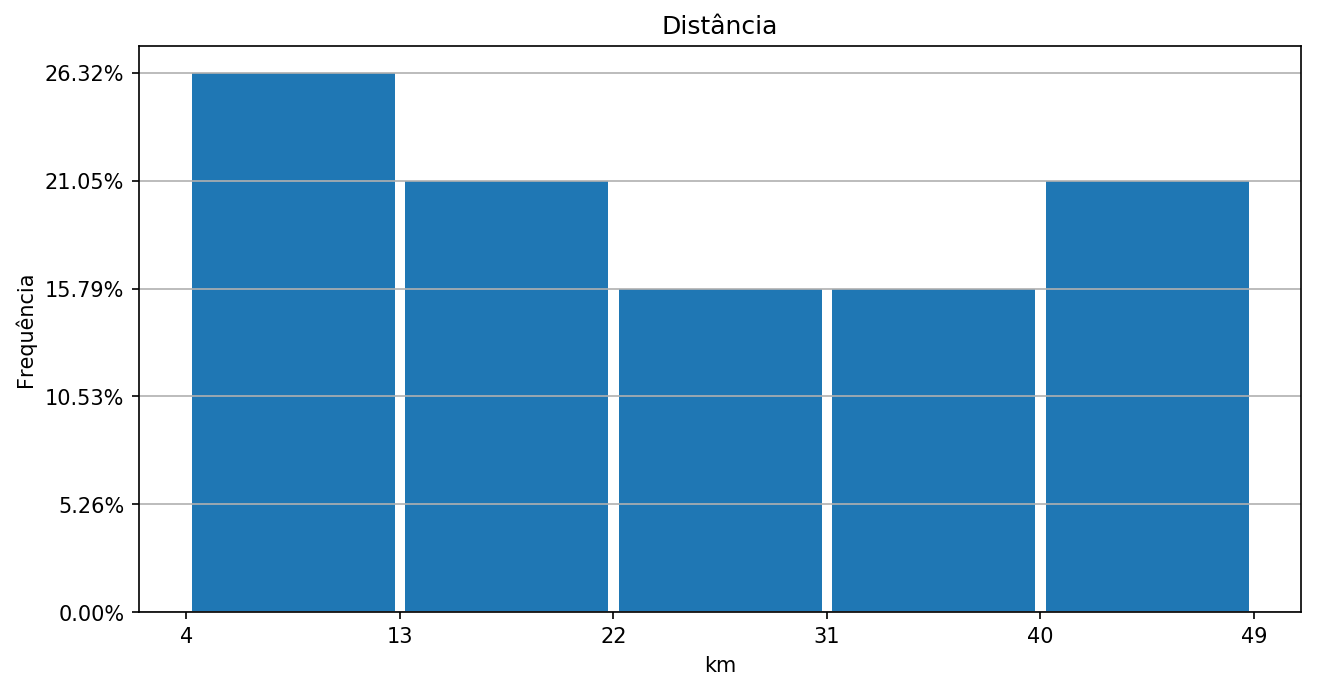

In [7]:
gera_histograma(5,km,'Distância','km')

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('weight-height.csv')

In [10]:
data['Altura cm'] = data['Height']*2.54

In [11]:
data['Altura cm'] = data['Altura cm'].round(0)

In [12]:
data['Peso kg'] = data['Weight']*0.453592

In [13]:
data['Peso kg'] = data['Peso kg'].round(1)

In [14]:
peso_mulheres = data.loc[data['Gender']=='Female']['Peso kg']

In [15]:
peso_homens = data.loc[data['Gender']=='Male']['Peso kg']

In [16]:
altura_mulheres = data.loc[data['Gender']=='Female']['Altura cm']

In [17]:
altura_homens = data.loc[data['Gender']=='Male']['Altura cm']

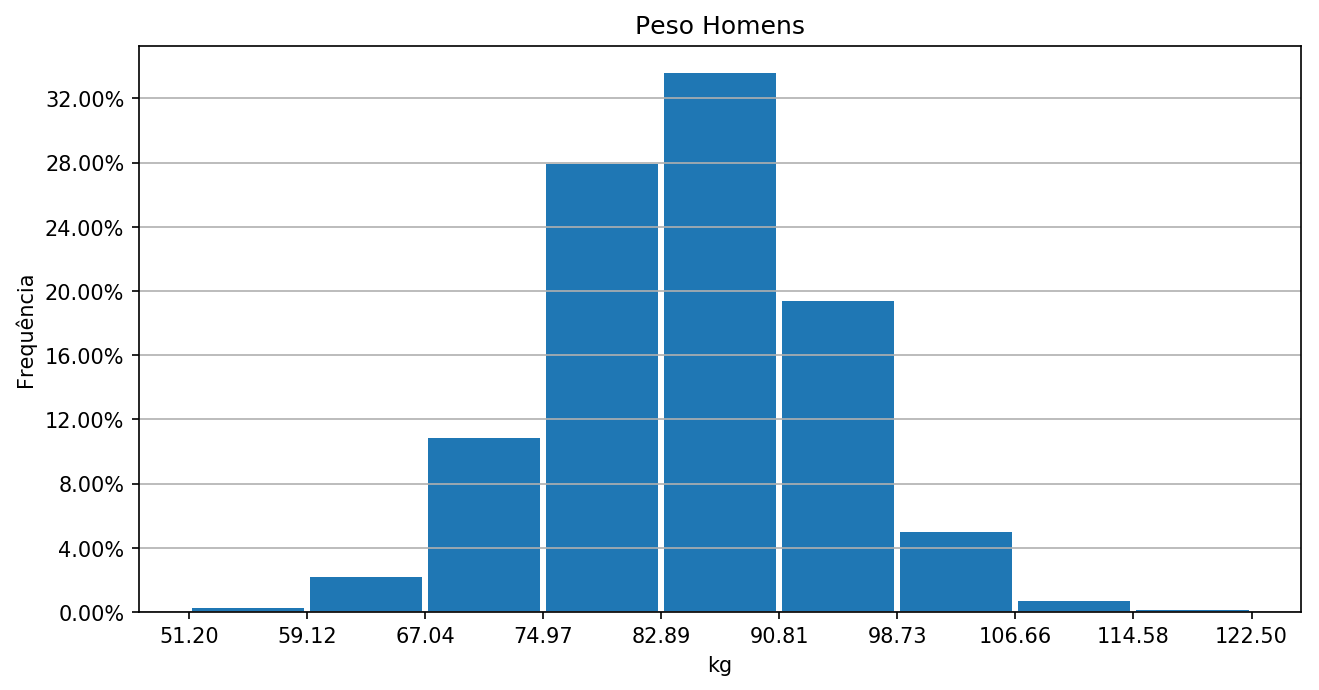

In [18]:
gera_histograma(9,peso_homens,'Peso Homens','kg')

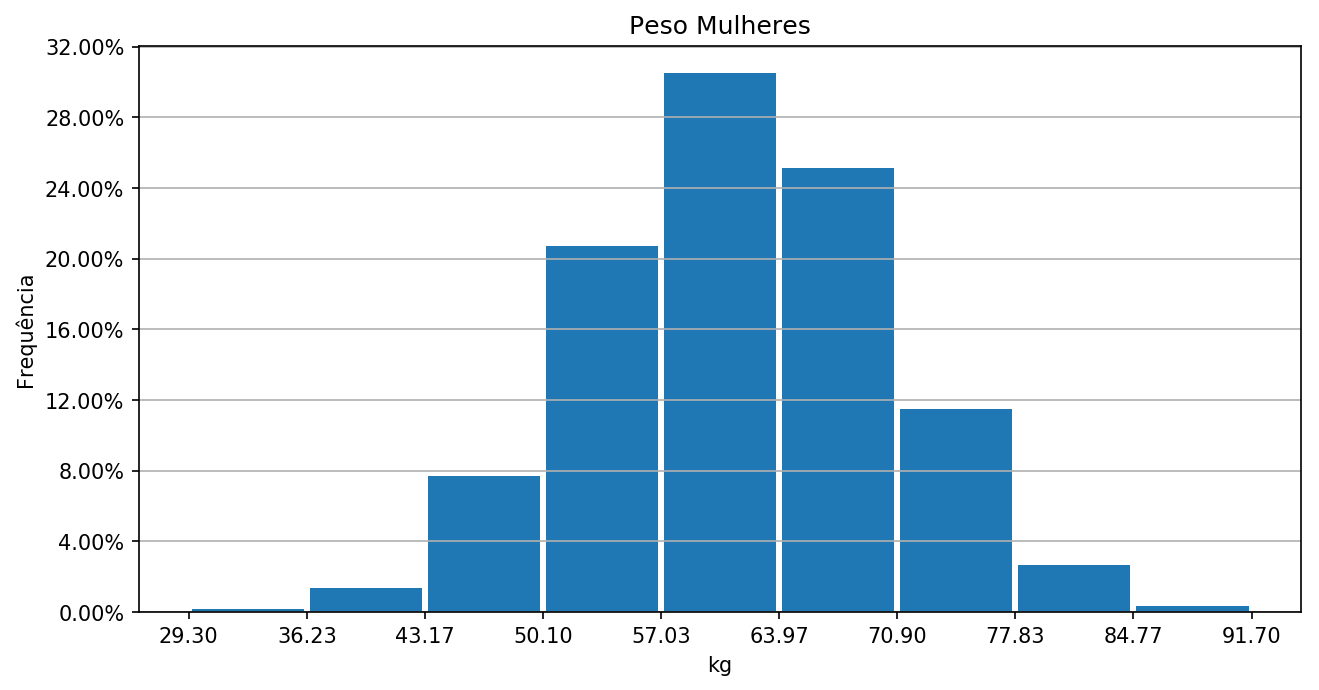

In [19]:
gera_histograma(9,peso_mulheres,'Peso Mulheres','kg')

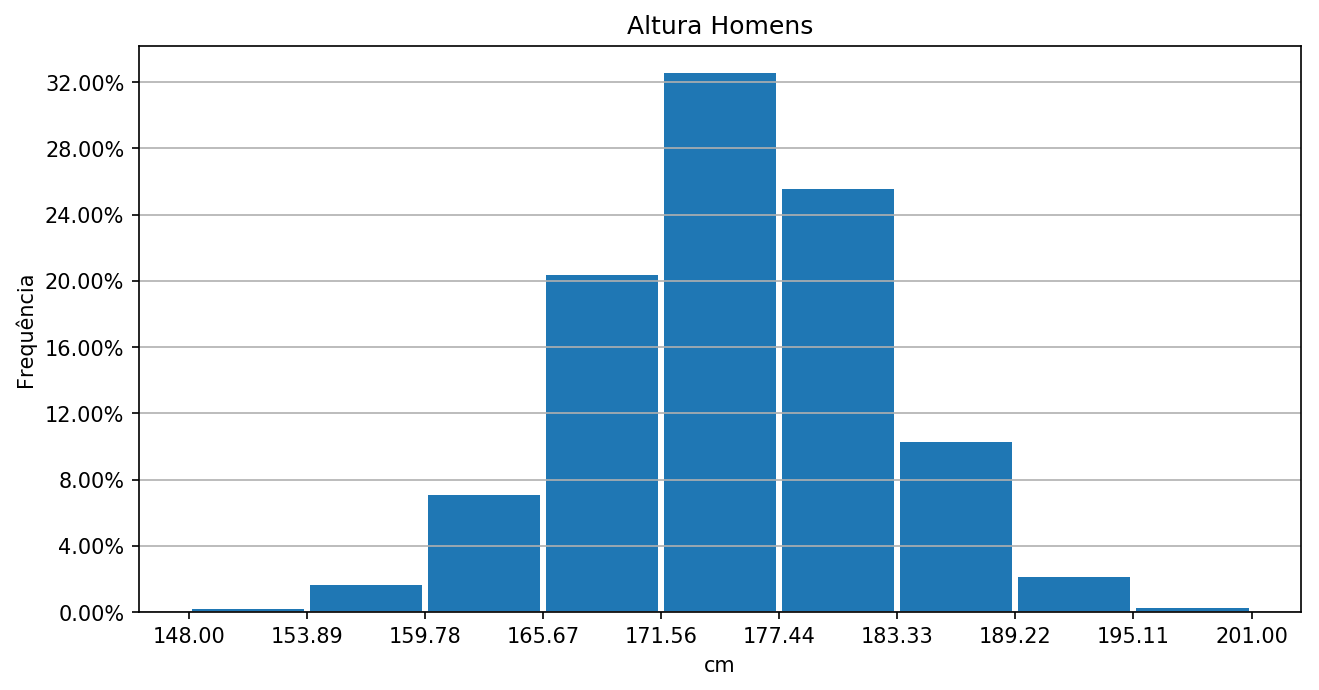

In [20]:
gera_histograma(9,altura_homens,'Altura Homens','cm')

In [21]:
data.head() #polegada para cm *2.54

,Gender,Height,Weight,Altura cm,Peso kg
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6


In [22]:
import statistics as stats

# Média
Somatório de valores de determinados elementos dividido pela quantidade de elementos somados.

In [23]:
stats.mean(altura_homens)

175.327

# Mediana
Dada uma sequência de valores ordenados em ordem crescente ou decrescente, a mediana é o valor central dessa sequência. Caso haja dois valores centrais, a mediana é dada pela média aritmética deles.

In [24]:
stats.median(altura_homens)

175.0

# Moda
Dado um conjunto de valores, a moda é o número que mais se repete.

In [25]:
stats.mode(altura_homens)

175.0

In [26]:
len(altura_homens)

5000

In [27]:
cinco = altura_homens.head()
cinco

0    148.0
1    151.0
2    152.0
3    152.0
4    152.0
Name: Altura cm, dtype: float64

In [28]:
media = stats.mean(cinco)
media

151.0

In [29]:
n = len(cinco)
n

5

<center><h2>Variância - População</h2></center>

$$\sigma^{2} = {\frac {\sum _{i=1}^{N}(x_{i}-\mu )^{2}}{N}}$$

<center><h2>Variância - Amostra</h2></center>

$$s^{2}={\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n-1}}$$

In [30]:
var = ( (148-media)**2 + (151-media)**2 + 3*(152-media)**2 ) / (n-1)
var

3.0

In [31]:
stats.variance(cinco)

3.0

## Desvio Padrão - População

$\sqrt{\sigma^{2}}=\sigma$

## Desvio Padrão - Amostra

$\sqrt{S^{2}}=S$

In [32]:
import math

In [33]:
S = math.sqrt(var)
S 

1.7320508075688772

In [34]:
stats.stdev(cinco)

1.7320508075688772

In [35]:
dp_altura_mulheres = stats.stdev(altura_mulheres)
dp_altura_mulheres

6.850207268975559

In [36]:
media_altura_mulheres = stats.mean(altura_mulheres)
media_altura_mulheres

161.8112

In [37]:
dp_altura_homens = stats.stdev(altura_homens)
dp_altura_homens

7.286747582980188

In [38]:
media_altura_homens = stats.mean(altura_homens)
media_altura_homens

175.327

## Coeficiente de Variação - População

$$CV = {\frac \sigma {\mu}}$$

## Coeficiente de Variação - Amostra

$$CV = {\frac S {\overline {x}}}$$

In [39]:
cv_altura_mulheres = dp_altura_mulheres/media_altura_mulheres
cv_altura_mulheres

0.04233456811997908

In [40]:
pct(cv_altura_mulheres)

'4.23%'

In [41]:
cv_altura_homens = dp_altura_homens/media_altura_homens
cv_altura_homens

0.04156089811027502

In [42]:
pct(cv_altura_homens)

'4.16%'

In [43]:
dp_peso_mulheres = stats.stdev(peso_mulheres)
dp_peso_mulheres

8.628900165444785

In [44]:
media_peso_mulheres = stats.mean(peso_mulheres)
media_peso_mulheres

61.62572

In [45]:
cv_peso_mulheres = dp_peso_mulheres/media_peso_mulheres
cv_peso_mulheres

0.14002108479129793

In [46]:
pct(cv_peso_mulheres)

'14.00%'

In [47]:
dp_peso_homens = stats.stdev(peso_homens)
dp_peso_homens

8.972419975906433

In [48]:
media_peso_homens = stats.mean(peso_homens)
media_peso_homens

84.8308

In [49]:
cv_peso_homens = dp_peso_homens/media_peso_homens
cv_peso_homens

0.10576842344887039

In [50]:
pct(cv_peso_homens)

'10.58%'

In [51]:
cv_dict = {'homens':{'cv peso': pct(cv_peso_homens), 'cv altura': pct(cv_altura_homens)},
           'mulheres': {'cv peso': pct(cv_peso_mulheres), 'cv altura': pct(cv_altura_mulheres)}}

In [52]:
cv_dict

{'homens': {'cv peso': '10.58%', 'cv altura': '4.16%'},
 'mulheres': {'cv peso': '14.00%', 'cv altura': '4.23%'}}

In [53]:
cv = pd.DataFrame.from_dict(cv_dict)

In [54]:
cv

,homens,mulheres
cv altura,4.16%,4.23%
cv peso,10.58%,14.00%


<center><h2>Covariância - População</h2></center>

$$Cov(x,y)={\frac {\sum _{i=1}^{N}(x_{i}-{\mu_{x}})*(y_{i}-{\mu_{y}})}{N}}$$

<center><h2>Covariância - Amostra</h2></center>

$$Cov(x,y)={\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})*(y_{i}-{\overline {y}})}{n-1}}$$

In [55]:
topcinco = data.head()
topcinco

,Gender,Height,Weight,Altura cm,Peso kg
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6


In [56]:
topcinco = topcinco[['Altura cm', 'Peso kg']]

In [57]:
topcinco

,Altura cm,Peso kg
0,188.0,109.7
1,175.0,73.6
2,188.0,96.5
3,182.0,99.8
4,177.0,93.6


In [58]:
stats.mean(topcinco['Altura cm'])

182.0

In [59]:
media_altura = topcinco['Altura cm'].mean()
media_altura

182.0

In [60]:
media_peso = topcinco['Peso kg'].mean()
media_peso

94.64000000000001

In [61]:
topcinco_lista = []

In [62]:
for i in range(0,len(topcinco)):
    topcinco_lista.append((topcinco['Altura cm'][i]-media_altura)*(topcinco['Peso kg'][i]-media_peso))

In [63]:
topcinco_lista

[90.35999999999993,
 147.28000000000014,
 11.159999999999911,
 0.0,
 5.200000000000102]

In [64]:
topcinco_cov = sum(topcinco_lista)/(len(topcinco)-1)
topcinco_cov

63.50000000000002

<center><h2>Coeficiente de Correlação</h2></center>

$${\frac {Cov(x,y)}{Stdev(x)*Stdev(y)}}$$

In [65]:
topcinco_dp_altura = stats.stdev(topcinco['Altura cm'])
topcinco_dp_altura

6.041522986797286

In [66]:
topcinco_dp_peso = stats.stdev(topcinco['Peso kg'])
topcinco_dp_peso

13.234915942309573

In [67]:
topcinco_coef_corr = topcinco_cov/(topcinco_dp_altura*topcinco_dp_peso)
topcinco_coef_corr

0.7941565198498657

In [68]:
pct(topcinco_coef_corr)

'79.42%'

In [69]:
topcinco.corr()

,Altura cm,Peso kg
Altura cm,1.000000,0.794157
Peso kg,0.794157,1.000000


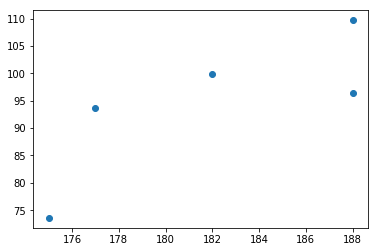

In [70]:
plt.scatter(topcinco['Altura cm'],topcinco['Peso kg'])

In [71]:
import seaborn as sns

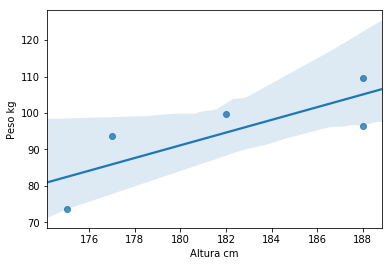

In [72]:
sns.regplot(topcinco['Altura cm'],topcinco['Peso kg'])

In [73]:
mulheres = data.loc[data['Gender']=='Female'][['Altura cm', 'Peso kg']]

In [74]:
homens = data.loc[data['Gender']=='Male']

In [75]:
homens = homens[['Altura cm', 'Peso kg']]

In [76]:
homens.corr()

,Altura cm,Peso kg
Altura cm,1.000000,0.862458
Peso kg,0.862458,1.000000


In [77]:
mulheres.corr()

,Altura cm,Peso kg
Altura cm,1.00000,0.84897
Peso kg,0.84897,1.00000


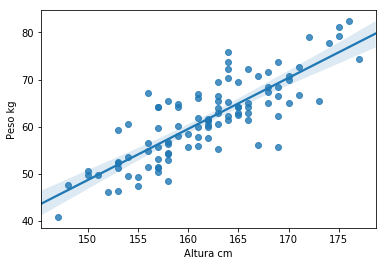

In [78]:
sns.regplot(mulheres['Altura cm'][2000:2100],mulheres['Peso kg'][2000:2100])

In [79]:
data

,Gender,Height,Weight,Altura cm,Peso kg
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6
5,Male,67.253016,152.212156,171.0,69.0
6,Male,68.785081,183.927889,175.0,83.4
7,Male,68.348516,167.971110,174.0,76.2
8,Male,67.018950,175.929440,170.0,79.8
9,Male,63.456494,156.399676,161.0,70.9
